dimensions de X (100, 5)
dimensions de y (100, 1)


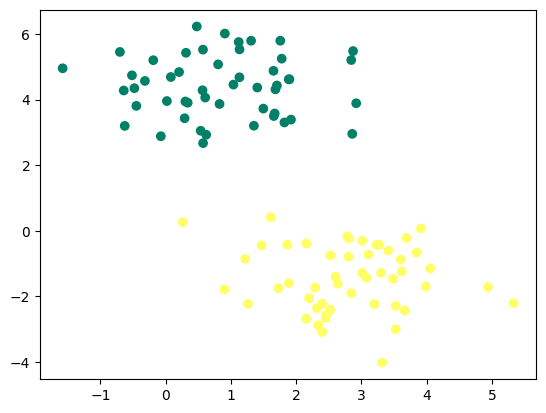

In [104]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples=100, n_features=5, centers=2, random_state=0)

y = y.reshape(y.shape[0], 1)

print('dimensions de X', X.shape)
print('dimensions de y', y.shape)

plt.scatter(X[:,0], X[:,1], c=y, cmap='summer')
plt.show()

Intialisation des paramètres

In [105]:
def initialisation(X):
    W = np.random.randn(X.shape[1], 1)
    b = np.random.randn(1)

    return (W, b)

Définition du model

In [106]:
def model(X, W, b):
    # model du 
    Z = X.dot(W) + b
    # fonction d'activation: sigmoid
    A = 1 / (1+np.exp(-Z))

    return A

Fonction de coût du model suivant le log loss

In [107]:
def log_loss(A, y):
    # on rajoute epsilon pour éviter des valeur nulle dans le log
    epsilon = 1.e-15
    return 1 / len(y) * np.sum(-y * np.log(A + epsilon) - (1 - y) * np.log(1 - A + epsilon))

Calcul du gradient descendent

In [108]:
def gradients(A, X, y):
    dW = 1 / len(y) * np.dot(X.T, A - y)
    db = 1 / len(y) * np.sum(A - y)

    return (dW, db)

Mise à jour des poids de variable pour la prochaine itération

In [109]:
def update(dW, db, W, b, learning_rate):
    W = W - learning_rate * dW
    b = b - learning_rate * db

    return (W, b) # valeur du modèle appris qui serviront à de futurs prédictions

Pour faire la prédiction à partir du modèle

In [110]:
def predict(X, W, b):
    A = model(X, W, b)
    # la valeur du simoig est compris entre 0 et 1
    # print(A) # activation (probabilité) associée à l'élément
    return A >= 0.5

Implémentation du réseau de neurone

In [111]:
from sklearn.metrics import accuracy_score
# gestion de la progression
!pip install tqdm
from tqdm import tqdm

In [127]:
def artificial_neuron(X_train, y_train, X_test, y_test, learning_rate = 0.1, n_iter = 100):
    # initialisation W, b
    W, b = initialisation(X_train)

    # Liste des valeurs: si décroissance, alors le modele apprend en réduisant les erreurs
    train_loss = []
    test_loss = []
    train_acc = []
    test_acc = []
    
    for i in tqdm(range(n_iter)):
        A = model(X_train, W, b)

        if i % 10 == 0:
            # Train: calculs des metrics chaque 10 iter
            train_loss.append(log_loss(A, y_train))
            y_pred = predict(X_train, W, b)
            train_acc.append(accuracy_score(y_train, y_pred))

            # Test
            # on fait un calcul de A sur le jeu de test 
            A_test = model(X_test, W, b)

            test_loss.append(log_loss(A_test, y_test))
            y_pred = predict(X_test, W, b)
            test_acc.append(accuracy_score(y_test, y_pred))

        dW, db = gradients(A, X_train, y_train)
        W, b = update(dW, db, W, b, learning_rate)
    
    # affichage de l'évolution des erreurs
    plt.figure(figsize=(12,4))
    plt.subplot(1, 2, 1)
    plt.plot(train_loss, label="train")
    plt.plot(test_loss, label="test")
    plt.legend()
    # précision du modèle
    plt.subplot(1, 2, 2)
    plt.plot(train_acc, label="train")
    plt.plot(test_acc, label="test")
    plt.show()

    return (W, b)

In [101]:
W, b = artificial_neuron(X, y)

TypeError: artificial_neuron() missing 3 required positional arguments: 'X_test', 'y_test', and 'y'

Prédiction de nouvelles valeur à partir du modèle

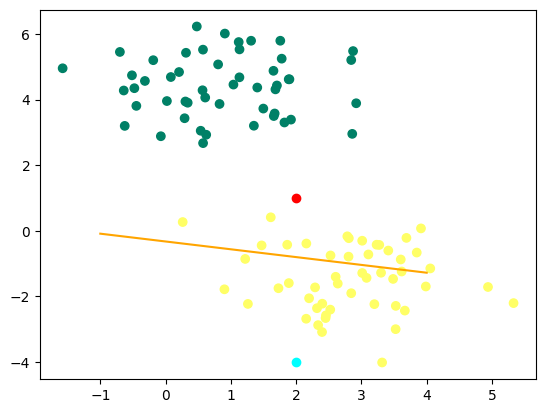

ValueError: shapes (5,) and (4096,1) not aligned: 5 (dim 0) != 4096 (dim 0)

In [102]:
new_plant = np.array([2, 1, 3, -2, -1])
new_plant2 = np.array([2, -4, 1, -3, 0])
plt.scatter(X[:,0], X[:,1], c=y, cmap='summer')
plt.scatter(new_plant[0], new_plant[1], c='r')
plt.scatter(new_plant2[0], new_plant2[1], c='cyan')

# Tracer la droite de décision du modèle: 
# équation de la droite : z(x0, x1) = 0 => x1 = (-w0.x0 - b) / x1  
x0 = np.linspace(-1, 4, 100) 
x1 = (-W[0] * x0 - b) / W[1]
plt.plot(x0, x1, c='orange')


plt.show()

predict(new_plant, W, b)
predict(new_plant2, W, b)

Exercice de prédiction Cats - Dogs avec le modèle précédent

In [ ]:
!pip install h5py
from utilities import *

In [112]:
X_train, y_train, X_test, y_test = load_data()

Le modèle étant entrainer sur un tableau à 2 dimension, pour nos images en 3D, il faut reshape les entrées. 
Cela se fait en applatissant nos images de 64x64 en ligne, ce qui donnera 4096.
Donc, on fini par un tableau de 1000,4096

In [128]:
# la division ici joue le role de normalisation (MinMax) : X = (X - min) / (max - min)
X_train_reshape = X_train.reshape(X_train.shape[0], -1) / X_train.max()
X_test_reshape = X_test.reshape(X_test.shape[0], -1) / X_train.max()

Entrainement sur le jeu de donnée des images

100%|██████████| 10000/10000 [00:22<00:00, 437.80it/s]


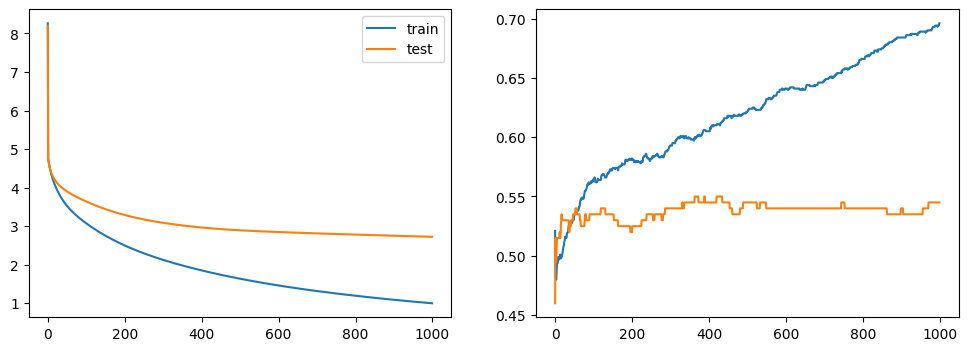

In [130]:
W, b = artificial_neuron(X_train_reshape, y_train, X_test_reshape, y_test, learning_rate=0.01, n_iter=10000)
# on constate un overtting sur ces graphiques. Pour cela, il faut plus de données, ou réduire le nombre de variables, ou appliquer les régularisations, ou encore améliorer le réseau de neurones